<a href="https://colab.research.google.com/github/Adarsh833/Adarsh833/blob/main/Adarsh_Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion_MNIST_Classification_Project


Importing Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras as tk

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [20]:
X_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [21]:
X_test.shape, y_test.shape


((10000, 28, 28), (10000,))

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [23]:
y_train[0]

9

In [24]:
class_labels = ["0) T-shirt/top", "1) Trouser", "2) Pullover", "3) Dress", "4) Coat", "5) Sandal", "6) Shirt", "7) Sneaker", "8) Bag", "9) Ankle Boot"]

Show Image

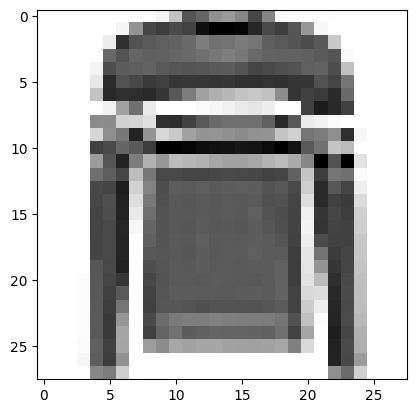

In [25]:
plt.imshow(X_train[5], cmap ='Greys')

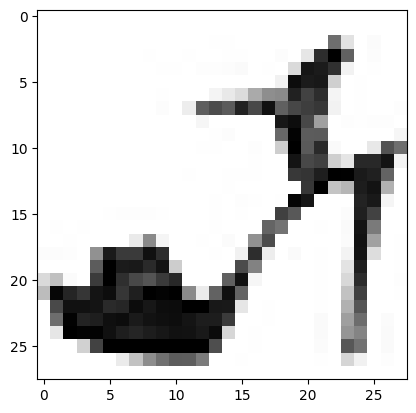

In [26]:
plt.imshow(X_train[9], cmap ='Greys')

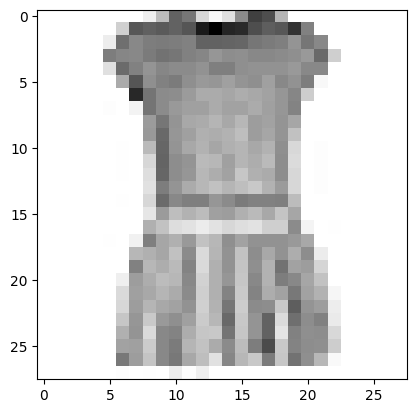

In [27]:
plt.imshow(X_train[3], cmap ='Greys')

In [28]:
y_test[3]

1

#Display Images 

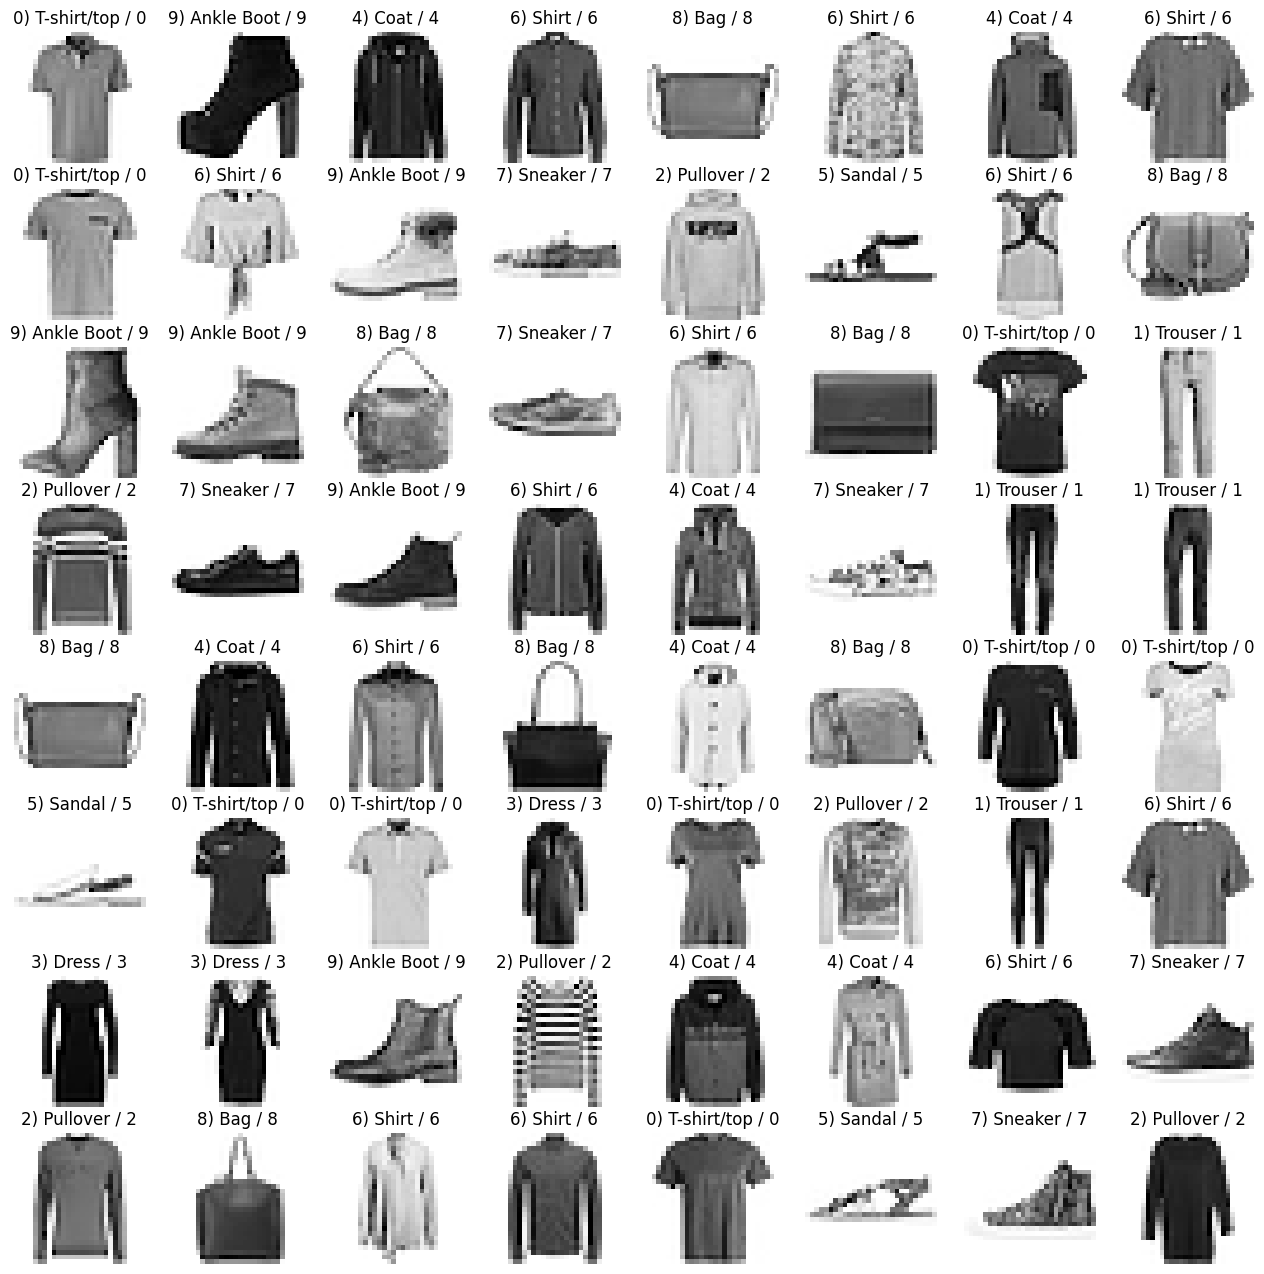

In [29]:
plt.figure(figsize = (16,16))
j = 1
for i in np.random.randint(0,1000,64):
  plt.subplot(8,8,j); j+=1
  plt.imshow(X_train[i], cmap = "Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [30]:
X_train.ndim

3

In [31]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [32]:
X_train.ndim

4

In [33]:
X_train.shape

(60000, 28, 28, 1)

#Feature Scaling

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Splitting Dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state = 2024)

In [37]:
X_train.shape, y_train.shape

((42000, 28, 28, 1), (42000,))

In [38]:
X_val.shape, y_val.shape

((18000, 28, 28, 1), (18000,))

#CNN - Model Building 

In [39]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax'),
])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=20, batch_size=1024, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0831 - accuracy: 0.9718 - val_loss: 0.2857 - val_accuracy: 0.9127
Epoch 2/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.2865 - val_accuracy: 0.9160
Epoch 3/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.2817 - val_accuracy: 0.9177
Epoch 4/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.3159 - val_accuracy: 0.9094
Epoch 5/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.2994 - val_accuracy: 0.9127
Epoch 6/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.2912 - val_accuracy: 0.9140
Epoch 7/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0523 - accuracy: 0.9860 - val_loss: 0.3219 - val_accuracy: 0.9058
Epoch 8/20
42

#Test the Model

In [52]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(3)

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(3))

1/1 [==============================] - 0s 66ms/step


9

In [54]:
y_pred = model.predict(X_test).round(3)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.002, ..., 0.04 , 0.004, 0.   ]], dtype=float32)

In [55]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.9113


[0.33445456624031067, 0.911300003528595]

Visualise Output

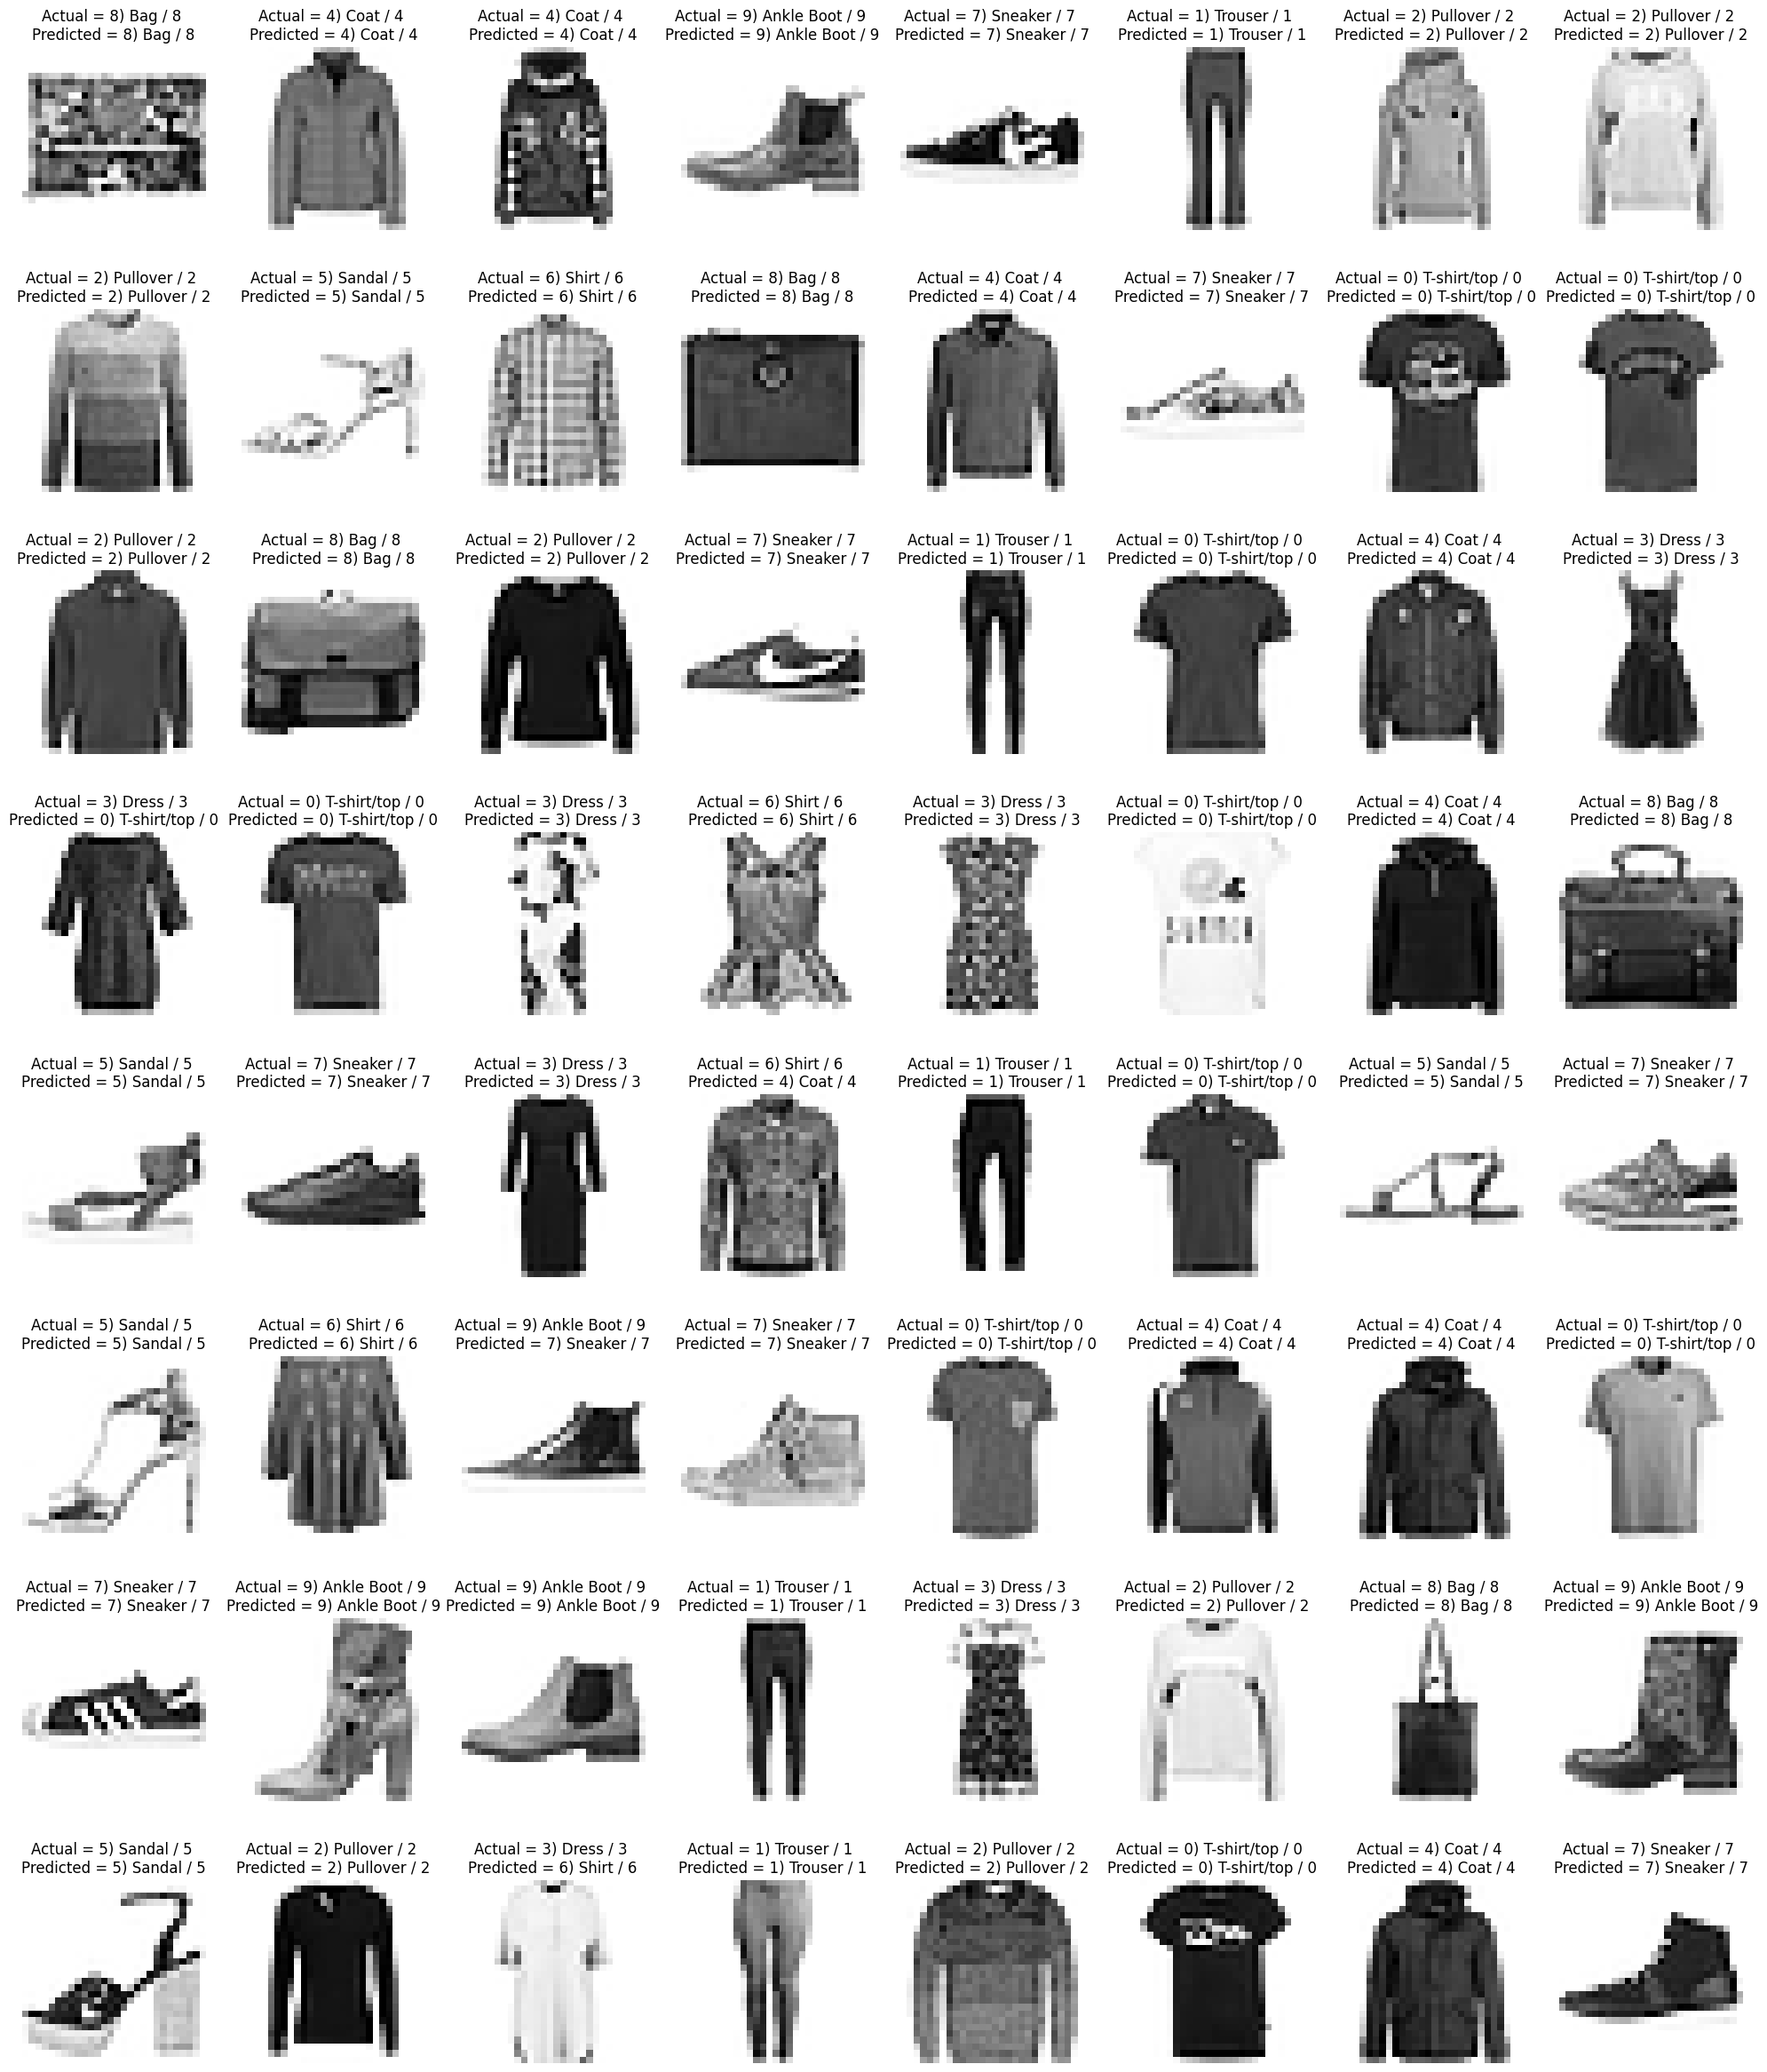

In [63]:
plt.figure(figsize = (25,30))
j = 1
for i in np.random.randint(0,1000,64):
  plt.subplot(8,8,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys")
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

##Confusion Matrix

<Axes: >

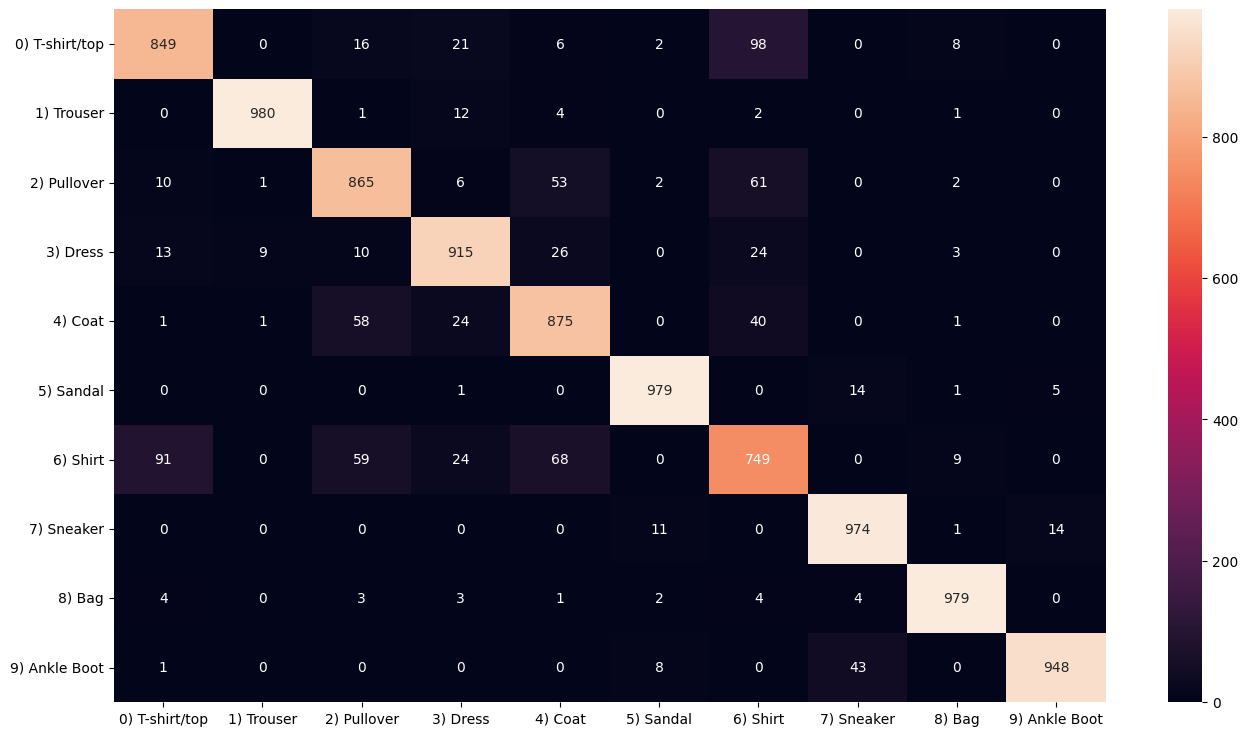

In [65]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [66]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

                precision    recall  f1-score   support

0) T-shirt/top       0.88      0.85      0.86      1000
    1) Trouser       0.99      0.98      0.98      1000
   2) Pullover       0.85      0.86      0.86      1000
      3) Dress       0.91      0.92      0.91      1000
       4) Coat       0.85      0.88      0.86      1000
     5) Sandal       0.98      0.98      0.98      1000
      6) Shirt       0.77      0.75      0.76      1000
    7) Sneaker       0.94      0.97      0.96      1000
        8) Bag       0.97      0.98      0.98      1000
 9) Ankle Boot       0.98      0.95      0.96      1000

      accuracy                           0.91     10000
     macro avg       0.91      0.91      0.91     10000
  weighted avg       0.91      0.91      0.91     10000



In [69]:
model.save('Adarsh_coincent_classification_cnn_model.h5')

In [70]:
path = '/content/drive/MyDrive/Colab Notebooks/Adarsh_coincent_classification_cnn_model_2.h5'
model.save(path)

In [71]:
model_deploy = keras.models.load_model('Adarsh_coincent_classification_cnn_model.h5')

In [72]:
model_deploy.predict(X_test).round(3)

313/313 [==============================] - 1s 2ms/step


array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.002, ..., 0.04 , 0.004, 0.   ]], dtype=float32)

In [76]:
model_deploy.predict(np.expand_dims(X_test[6], axis=0)).round(2)

1/1 [==============================] - 0s 97ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)